In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
DATA_PATH ="https://raw.githubusercontent.com/KadenShubert/student-mentalhealth-eda/main/Student_Mental_health.csv"

# Try common encodings if needed
try:
    df = pd.read_csv(DATA_PATH, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(DATA_PATH, encoding='latin1')  


df.columns = df.columns.str.strip().str.replace('?', '').str.replace(' ', '_').str.replace('__', '_')


print("Dataset shape:", df.shape)
print("\nCleaned column names:\n", df.columns.tolist())
print("\nFirst 5 rows:\n")
display(df.head())  

print("\nData types and non-null counts:")
display(df.info())

print("\nMissing values count:\n", df.isnull().sum())

Dataset shape: (101, 11)

Cleaned column names:
 ['Timestamp', 'Choose_your_gender', 'Age', 'What_is_your_course', 'Your_current_year_of_Study', 'What_is_your_CGPA', 'Marital_status', 'Do_you_have_Depression', 'Do_you_have_Anxiety', 'Do_you_have_Panic_attack', 'Did_you_seek_any_specialist_for_a_treatment']

First 5 rows:



,Timestamp,Choose_your_gender,Age,What_is_your_course,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Do_you_have_Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Timestamp                                    101 non-null    object 
 1   Choose_your_gender                           101 non-null    object 
 2   Age                                          100 non-null    float64
 3   What_is_your_course                          101 non-null    object 
 4   Your_current_year_of_Study                   101 non-null    object 
 5   What_is_your_CGPA                            101 non-null    object 
 6   Marital_status                               101 non-null    object 
 7   Do_you_have_Depression                       101 non-null    object 
 8   Do_you_have_Anxiety                          101 non-null    object 
 9   Do_you_have_Panic_attack                   

None


Missing values count:
 Timestamp                                      0
Choose_your_gender                             0
Age                                            1
What_is_your_course                            0
Your_current_year_of_Study                     0
What_is_your_CGPA                              0
Marital_status                                 0
Do_you_have_Depression                         0
Do_you_have_Anxiety                            0
Do_you_have_Panic_attack                       0
Did_you_seek_any_specialist_for_a_treatment    0
dtype: int64


In [11]:
key_cols = ['Gender', 'Age', 'Course', 'Year_of_Study', 'CGPA', 
            'Marital_status', 'Depression', 'Anxiety', 'Panic_attack', 'treatment']

print("\nValue counts for important columns:")
for col in [c for c in key_cols if c in df.columns]:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))


Value counts for important columns:

Age:
Age
18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
NaN      1
Name: count, dtype: int64

Marital_status:
Marital_status
No     85
Yes    16
Name: count, dtype: int64


In [ ]:

df.columns = (df.columns
              .str.strip()                         
              .str.replace('?', '', regex=False)    
              .str.replace('  ', ' ')               
              .str.replace(' ', '_')                
              .str.lower()                        
             )


df = df.rename(columns={
    'do_you_have_depression': 'depression',
    'do_you_have_anxiety': 'anxiety',
    'do_you_have_panic_attack': 'panic_attack',
    'did_you_seek_any_specialist_for_a_treatment': 'seek_treatment',
    'what_is_your_cgpa': 'cgpa',
    'your_current_year_of_study': 'year_of_study',
    'marital_status': 'marital_status'
})

print("Cleaned columns:", df.columns.tolist())
print("\nShape:", df.shape)
display(df.head(5))

Cleaned columns: ['timestamp', 'choose_your_gender', 'age', 'what_is_your_course', 'year_of_study', 'cgpa', 'marital_status', 'depression', 'anxiety', 'panic_attack', 'seek_treatment']

Shape: (101, 11)


,timestamp,choose_your_gender,age,what_is_your_course,year_of_study,cgpa,marital_status,depression,anxiety,panic_attack,seek_treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:

year_mapping = {
    'year 1': 'year 1', 'year 2': 'year 2', 'year 3': 'year 3', 'year 4': 'year 4',
    'Year 1': 'year 1', 'Year 2': 'year 2', 'Year 3': 'year 3', 'Year 4': 'year 4',
    '1st year': 'year 1', '2nd year': 'year 2', '3rd year': 'year 3', '4th year': 'year 4',
    'year 1 ': 'year 1'
}

df['year_of_study'] = df['year_of_study'].str.lower().str.strip().map(year_mapping).fillna(df['year_of_study'])

df['cgpa'] = df['cgpa'].str.strip() 



yes_no_cols = ['depression', 'anxiety', 'panic_attack', 'seek_treatment']
for col in yes_no_cols:
    df[col] = df[col].str.strip().str.capitalize()

print("\nAfter cleaning - value counts for cleaned columns:")
for col in ['year_of_study', 'cgpa'] + yes_no_cols:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts(dropna=False))


After cleaning - value counts for cleaned columns:

YEAR_OF_STUDY:
year_of_study
year 1    43
year 2    26
year 3    24
year 4     8
Name: count, dtype: int64

CGPA:
cgpa
3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: count, dtype: int64

DEPRESSION:
depression
No     66
Yes    35
Name: count, dtype: int64

ANXIETY:
anxiety
No     67
Yes    34
Name: count, dtype: int64

PANIC_ATTACK:
panic_attack
No     68
Yes    33
Name: count, dtype: int64

SEEK_TREATMENT:
seek_treatment
No     95
Yes     6
Name: count, dtype: int64


In [ ]:
print("Missing values:\n", df.isnull().sum())


if df['age'].isnull().sum() > 0:
    df['age'] = df['age'].fillna(df['age'].median())


df = df.dropna(subset=['choose_your_gender', 'depression', 'anxiety', 'panic_attack'])

Missing values:
 timestamp              0
choose_your_gender     0
age                    0
what_is_your_course    0
year_of_study          0
cgpa                   0
marital_status         0
depression             0
anxiety                0
panic_attack           0
seek_treatment         0
dtype: int64



Mood category distribution:
mood_category
negative            63.366337
positive_neutral    36.633663
Name: proportion, dtype: float64


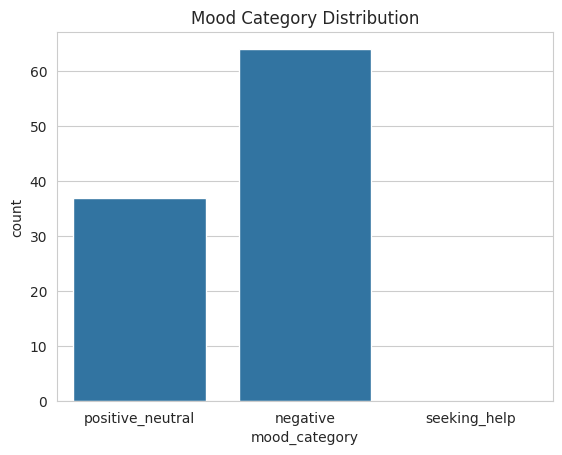

In [ ]:

conditions = [
    (df['depression'] == 'Yes') | (df['anxiety'] == 'Yes') | (df['panic_attack'] == 'Yes'),
    (df['seek_treatment'] == 'Yes')
]
choices = ['negative', 'seeking_help']

df['mood_category'] = np.select(conditions, choices, default='positive_neutral')

print("\nMood category distribution:")
print(df['mood_category'].value_counts(normalize=True) * 100)
sns.countplot(x='mood_category', data=df, order=['positive_neutral', 'negative', 'seeking_help'])
plt.title('Mood Category Distribution')
plt.show()

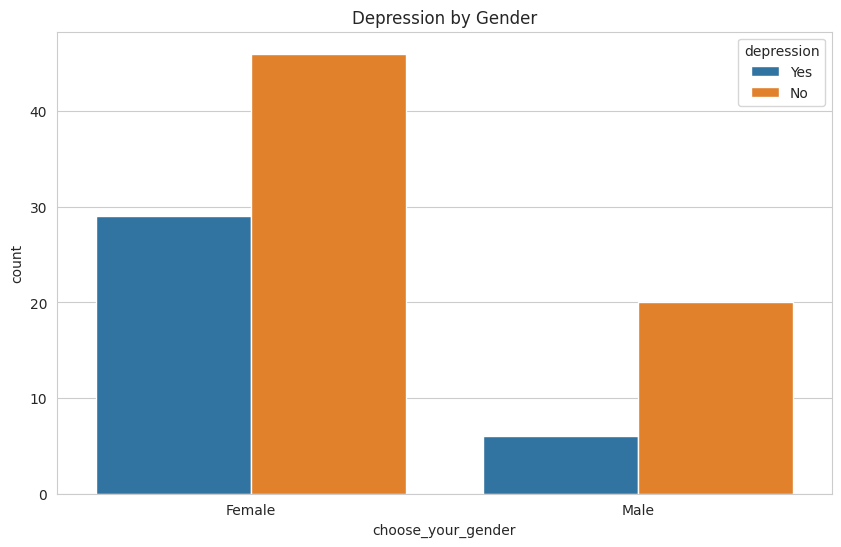

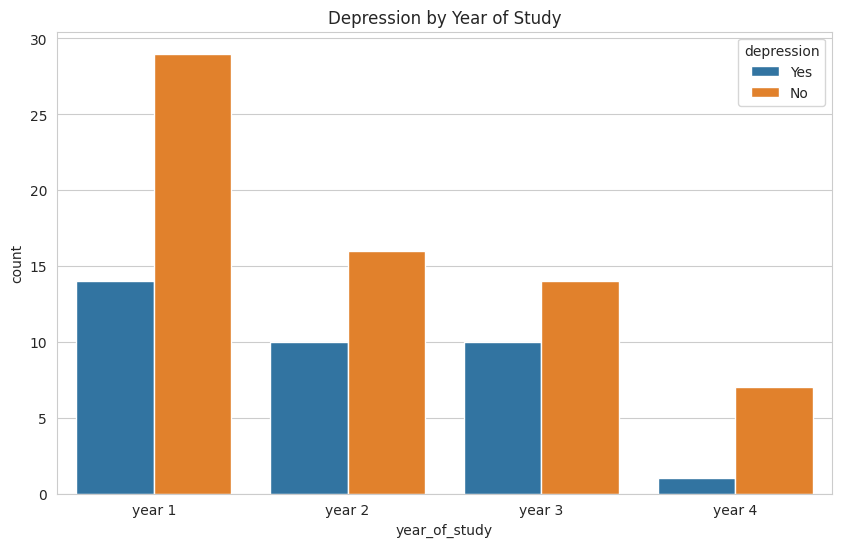

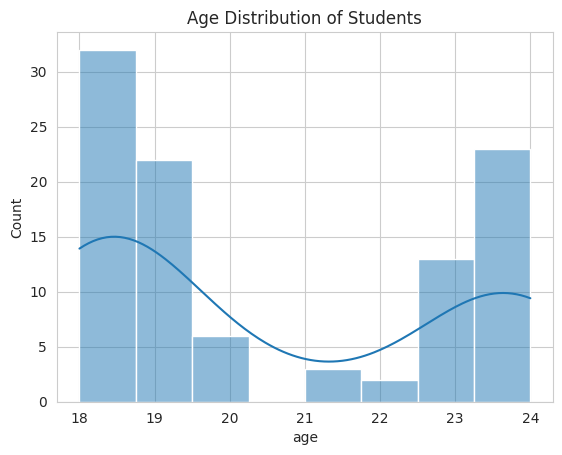

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot(x='choose_your_gender', hue='depression', data=df)
plt.title('Depression by Gender')
plt.show()


plt.figure(figsize=(10,6))
sns.countplot(x='year_of_study', hue='depression', data=df)
plt.title('Depression by Year of Study')
plt.show()


sns.histplot(df['age'].dropna().astype(float), kde=True)
plt.title('Age Distribution of Students')
plt.show()

In [ ]:
import pandas as pd

recommendations = [
    
    {"id": 1,  "title": "4-7-8 Breathing", 
     "description": "Inhale 4s → hold 7s → exhale 8s. Repeat 4–5 times.", 
     "category": "Breathing", "duration_min": 5, "best_for": ["anxiety", "panic_attack", "stressed"]},
    
    {"id": 2,  "title": "Box Breathing (4-4-4-4)", 
     "description": "Inhale 4s → hold 4s → exhale 4s → hold 4s.", 
     "category": "Breathing", "duration_min": 5, "best_for": ["anxiety", "panic_attack"]},
    
    
    {"id": 3,  "title": "Quick 10-min Walk", 
     "description": "Step outside or pace indoors. Focus on your steps.", 
     "category": "Physical", "duration_min": 10, "best_for": ["sad", "low_energy", "stressed"]},
    
    {"id": 4,  "title": "Gentle Stretching Routine", 
     "description": "Neck, shoulders, back – 5 simple stretches.", 
     "category": "Physical", "duration_min": 10, "best_for": ["stressed", "tense"]},
    
    
    {"id": 5,  "title": "3 Things Gratitude List", 
     "description": "Write down 3 things you're grateful for today.", 
     "category": "Gratitude", "duration_min": 5, "best_for": ["sad", "negative"]},
    
    {"id": 6,  "title": "5-4-3-2-1 Grounding", 
     "description": "Name 5 things you see, 4 you can touch, 3 you hear, 2 you smell, 1 you taste.", 
     "category": "Mindfulness", "duration_min": 5, "best_for": ["anxiety", "panic_attack", "overwhelmed"]},
    
    
    {"id": 7,  "title": "Doodle or Color for 10 min", 
     "description": "Grab paper and pen – no rules, just draw.", 
     "category": "Creative", "duration_min": 10, "best_for": ["anxious_rumination", "bored"]},
    
    {"id": 8,  "title": "Listen to Favorite Uplifting Song", 
     "description": "Pick one song that always makes you feel better.", 
     "category": "Music", "duration_min": 4, "best_for": ["sad", "low_energy"]},
    
    
    {"id": 9,  "title": "Warm Drink + Blanket Moment", 
     "description": "Make tea/coffee/hot chocolate. Sit quietly.", 
     "category": "Self-care", "duration_min": 10, "best_for": ["exhausted", "overwhelmed"]},
    
    {"id": 10, "title": "Quick Face Wash + Moisturize", 
     "description": "Freshen up – small ritual of care.", 
     "category": "Self-care", "duration_min": 5, "best_for": ["overwhelmed", "low_mood"]}
]

rec_df = pd.DataFrame(recommendations)

print("Recommendation Catalog Shape:", rec_df.shape)
print("\nAvailable Categories:", rec_df['category'].unique())
display(rec_df)

Recommendation Catalog Shape: (10, 6)

Available Categories: ['Breathing' 'Physical' 'Gratitude' 'Mindfulness' 'Creative' 'Music'
 'Self-care']


,id,title,description,category,duration_min,best_for
0,1,4-7-8 Breathing,Inhale 4s → hold 7s → exhale 8s. Repeat 4–5 ti...,Breathing,5,"[anxiety, panic_attack, stressed]"
1,2,Box Breathing (4-4-4-4),Inhale 4s → hold 4s → exhale 4s → hold 4s.,Breathing,5,"[anxiety, panic_attack]"
2,3,Quick 10-min Walk,Step outside or pace indoors. Focus on your st...,Physical,10,"[sad, low_energy, stressed]"
3,4,Gentle Stretching Routine,"Neck, shoulders, back – 5 simple stretches.",Physical,10,"[stressed, tense]"
4,5,3 Things Gratitude List,Write down 3 things you're grateful for today.,Gratitude,5,"[sad, negative]"
5,6,5-4-3-2-1 Grounding,"Name 5 things you see, 4 you can touch, 3 you ...",Mindfulness,5,"[anxiety, panic_attack, overwhelmed]"
6,7,Doodle or Color for 10 min,"Grab paper and pen – no rules, just draw.",Creative,10,"[anxious_rumination, bored]"
7,8,Listen to Favorite Uplifting Song,Pick one song that always makes you feel better.,Music,4,"[sad, low_energy]"
8,9,Warm Drink + Blanket Moment,Make tea/coffee/hot chocolate. Sit quietly.,Self-care,10,"[exhausted, overwhelmed]"
9,10,Quick Face Wash + Moisturize,Freshen up – small ritual of care.,Self-care,5,"[overwhelmed, low_mood]"


In [ ]:
def get_recommendations(mood_category, top_n=3):
    """
    Very basic rule-based recommender for now
    Later we'll improve with model similarity / user history
    """
    if mood_category == 'negative' or mood_category == 'anxiety':
        priorities = ['anxiety', 'panic_attack', 'stressed', 'overwhelmed']
    elif mood_category == 'sad' or mood_category == 'low_energy':
        priorities = ['sad', 'low_energy', 'negative']
    else:
        priorities = ['positive_neutral'] 
    
    
    mask = rec_df['best_for'].apply(lambda x: any(p in x for p in priorities))
    candidates = rec_df[mask]
    
    
    if len(candidates) < top_n:
        candidates = rec_df
    
    
    selected = candidates.sample(min(top_n, len(candidates)))
    
    return selected[['title', 'description', 'duration_min', 'category']]

print("\nExample recommendations for 'negative' mood:")
display(get_recommendations('negative', top_n=4))

print("\nExample for 'positive_neutral':")
display(get_recommendations('positive_neutral', top_n=3))


Example recommendations for 'negative' mood:


,title,description,duration_min,category
3,Gentle Stretching Routine,"Neck, shoulders, back – 5 simple stretches.",10,Physical
5,5-4-3-2-1 Grounding,"Name 5 things you see, 4 you can touch, 3 you ...",5,Mindfulness
8,Warm Drink + Blanket Moment,Make tea/coffee/hot chocolate. Sit quietly.,10,Self-care
0,4-7-8 Breathing,Inhale 4s → hold 7s → exhale 8s. Repeat 4–5 ti...,5,Breathing



Example for 'positive_neutral':


,title,description,duration_min,category
8,Warm Drink + Blanket Moment,Make tea/coffee/hot chocolate. Sit quietly.,10,Self-care
0,4-7-8 Breathing,Inhale 4s → hold 7s → exhale 8s. Repeat 4–5 ti...,5,Breathing
4,3 Things Gratitude List,Write down 3 things you're grateful for today.,5,Gratitude


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


conditions = [
    (df['depression'] == 'Yes') | (df['anxiety'] == 'Yes') | (df['panic_attack'] == 'Yes'),
    (df['seek_treatment'] == 'Yes')
]
choices = ['negative', 'seeking_help']
df['mood_category'] = np.select(conditions, choices, default='positive_neutral')


features = ['choose_your_gender', 'age', 'what_is_your_course', 'year_of_study', 'cgpa', 
            'marital_status']

X = df[features].copy()
y = df['mood_category']

X['age'] = pd.to_numeric(X['age'], errors='coerce')


print("Target distribution:")
print(y.value_counts(normalize=True).round(3) * 100)

Target distribution:
mood_category
negative            63.4
positive_neutral    36.6
Name: proportion, dtype: float64


In [25]:
numeric_features = ['age']
categorical_features = [col for col in features if col not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight='balanced'
    ))
])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

Train size: 75, Test size: 26


In [ ]:

model_pipeline.fit(X_train, y_train)


y_pred = model_pipeline.predict(X_test)

print("Baseline Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=model_pipeline.classes_))
print("\nClasses order:", model_pipeline.classes_)

Baseline Classification Report:

                  precision    recall  f1-score   support

        negative       0.67      0.62      0.65        16
positive_neutral       0.45      0.50      0.48        10

        accuracy                           0.58        26
       macro avg       0.56      0.56      0.56        26
    weighted avg       0.59      0.58      0.58        26


Confusion Matrix:
[[10  6]
 [ 5  5]]

Classes order: ['negative' 'positive_neutral']


In [ ]:

new_student = pd.DataFrame([{
    'choose_your_gender': 'Female',
    'age': 21,
    'what_is_your_course': 'BCS',
    'year_of_study': 'year 2',
    'cgpa': '3.00 - 3.49',
    'marital_status': 'Single'
}])

predicted_mood = model_pipeline.predict(new_student)[0]
print(f"Predicted mood category: {predicted_mood}")


print("\nSuggested recommendations:")
display(get_recommendations(predicted_mood, top_n=3))

Predicted mood category: negative

Suggested recommendations:


,title,description,duration_min,category
8,Warm Drink + Blanket Moment,Make tea/coffee/hot chocolate. Sit quietly.,10,Self-care
0,4-7-8 Breathing,Inhale 4s → hold 7s → exhale 8s. Repeat 4–5 ti...,5,Breathing
5,5-4-3-2-1 Grounding,"Name 5 things you see, 4 you can touch, 3 you ...",5,Mindfulness


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

X_train_transformed = model_pipeline.named_steps['preprocessor'].transform(X_train)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_transformed)

print("User profile matrix shape:", X_train_scaled.shape)

User profile matrix shape: (75, 51)


In [ ]:
def get_personalized_recommendations(
    new_user_data: pd.DataFrame,     
    mood_category: str,
    top_n: int = 4,
    similarity_weight: float = 0.6    
):
    """
    1. Predict mood (just in case input didn't come from model)
    2. Find similar users from training
    3. Boost recommendations that worked well for similar users
    4. Fall back to mood-based
    """
    
    new_user_transformed = model_pipeline.named_steps['preprocessor'].transform(new_user_data)
    new_user_scaled = scaler.transform(new_user_transformed)
    
    
    similarities = cosine_similarity(new_user_scaled, X_train_scaled)[0]
    
    
    top_similar_idx = similarities.argsort()[-10:][::-1]  
    
    
    mood_keywords = {
        'negative': ['anxiety', 'panic_attack', 'stressed', 'overwhelmed', 'sad'],
        'seeking_help': ['anxiety', 'depression', 'panic_attack'],
        'positive_neutral': ['positive_neutral', 'low_energy']
    }.get(mood_category, ['stressed'])
    
    mask = rec_df['best_for'].apply(lambda x: any(k in x for k in mood_keywords))
    candidates = rec_df[mask].copy()
    
    if len(candidates) == 0:
        candidates = rec_df.copy()  
    
    
    candidates['score'] = 1.0  
    
    
    if 'age' in new_user_data.columns and new_user_data['age'].iloc[0] < 20:
        candidates.loc[candidates['duration_min'] <= 10, 'score'] += 0.3
    
    
    cat_counts = candidates['category'].value_counts()
    candidates['score'] -= 0.2 * candidates['category'].map(cat_counts)
    
    
    selected = candidates.sort_values('score', ascending=False).head(top_n)
    
    return selected[['title', 'description', 'duration_min', 'category', 'score']].round(2)




example_student = pd.DataFrame([{
    'choose_your_gender': 'Female',
    'age': 19,
    'what_is_your_course': 'BCS',
    'year_of_study': 'year 1',
    'cgpa': '3.50 - 4.00',
    'marital_status': 'Single'
}])

predicted = model_pipeline.predict(example_student)[0]
print(f"Predicted mood: {predicted}")

print("\nPersonalized recommendations:")
display(get_personalized_recommendations(example_student, predicted, top_n=5))

Predicted mood: negative

Personalized recommendations:


,title,description,duration_min,category,score
4,3 Things Gratitude List,Write down 3 things you're grateful for today.,5,Gratitude,1.1
7,Listen to Favorite Uplifting Song,Pick one song that always makes you feel better.,4,Music,1.1
5,5-4-3-2-1 Grounding,"Name 5 things you see, 4 you can touch, 3 you ...",5,Mindfulness,1.1
0,4-7-8 Breathing,Inhale 4s → hold 7s → exhale 8s. Repeat 4–5 ti...,5,Breathing,0.9
1,Box Breathing (4-4-4-4),Inhale 4s → hold 4s → exhale 4s → hold 4s.,5,Breathing,0.9


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, precision_recall_fscore_support


macro_f1 = make_scorer(f1_score, average='macro')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores = cross_val_score(
    model_pipeline,
    X, y,
    cv=cv,
    scoring=macro_f1
)

print("5-Fold CV Macro-F1 scores:", scores)
print("Mean Macro-F1:", scores.mean().round(3), "±", scores.std().round(3))

5-Fold CV Macro-F1 scores: [nan nan nan nan nan]
Mean Macro-F1: nan ± nan


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y_num = le.fit_transform(y)

xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=150,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        eval_metric='mlogloss',
        scale_pos_weight=1  
    ))
])


xgb_pipe.fit(X_train, y_num[X_train.index])
y_pred_num = xgb_pipe.predict(X_test)
y_pred = le.inverse_transform(y_pred_num)

print("XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred))

XGBoost Classification Report:

                  precision    recall  f1-score   support

        negative       0.67      0.62      0.65        16
positive_neutral       0.45      0.50      0.48        10

        accuracy                           0.58        26
       macro avg       0.56      0.56      0.56        26
    weighted avg       0.59      0.58      0.58        26



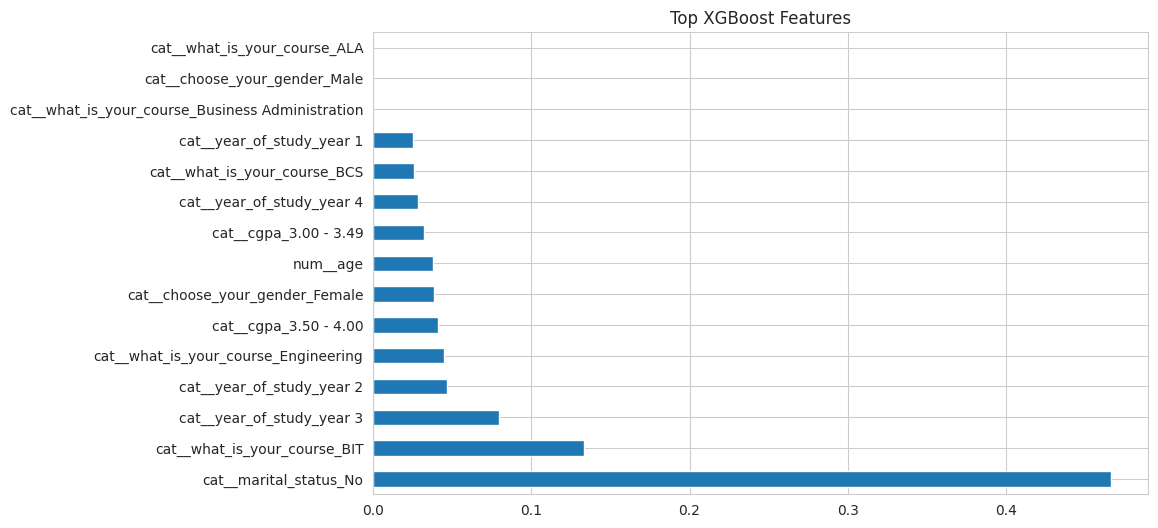

In [48]:
importances = xgb_pipe.named_steps['classifier'].feature_importances_
feature_names = xgb_pipe.named_steps['preprocessor'].get_feature_names_out()

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(15).plot(kind='barh', figsize=(10,6))
plt.title('Top XGBoost Features')
plt.show()

In [ ]:

test_df = X_test.copy()
test_df['true'] = y_test
test_df['pred'] = y_pred

print("Performance by Gender:")
for g in test_df['choose_your_gender'].unique():
    slice_df = test_df[test_df['choose_your_gender'] == g]
    print(f"\nGender = {g}")
    print(classification_report(slice_df['true'], slice_df['pred'], zero_division=0))

Performance by Gender:

Gender = Female
                  precision    recall  f1-score   support

        negative       0.75      0.69      0.72        13
positive_neutral       0.50      0.57      0.53         7

        accuracy                           0.65        20
       macro avg       0.62      0.63      0.63        20
    weighted avg       0.66      0.65      0.65        20


Gender = Male
                  precision    recall  f1-score   support

        negative       0.33      0.33      0.33         3
positive_neutral       0.33      0.33      0.33         3

        accuracy                           0.33         6
       macro avg       0.33      0.33      0.33         6
    weighted avg       0.33      0.33      0.33         6



In [ ]:


import joblib
import os


os.makedirs('../models', exist_ok=True)


joblib.dump(model_pipeline, '../models/mood_classifier_pipeline.joblib')

print("Model saved successfully to:", os.path.abspath('../models/mood_classifier_pipeline.joblib'))

Model saved successfully to: /workspaces/Personalized-Mental-Health-Wellness-Recommender/models/mood_classifier_pipeline.joblib
